In [22]:
import os
import pandas as pd
import numpy as np
import random
from sklearn.pipeline import Pipeline
from scipy.stats import uniform

# for text pre-processing
import string
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction import text

wordnet_lemmatizer = WordNetLemmatizer()
string.punctuation
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(x for x in text.ENGLISH_STOP_WORDS if x not in stopwords)
stopwords.extend(["edu", "uk", "com"])

# for model-building
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# visualizers
import seaborn as sns
import matplotlib.pyplot as plt 

#Change the path to input data to which ever folder contains test and datasets.
trainpath = r"C:\Users\James\machinelearning\Datasets\20news-bydate-txt-true\20news-bydate-train"
testpath = r"C:\Users\James\machinelearning\Datasets\20news-bydate-txt-true\20news-bydate-test"

os.chdir(trainpath)

rawtrain = []
rawtest = []

directory_contents = os.listdir(trainpath)
print(directory_contents)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\James\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\James\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\James\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [23]:
def pullTrainSet():
    for foldername in directory_contents:
        currentdirectory = trainpath + r"\\" + foldername
        os.chdir(currentdirectory)
        for filename in os.listdir(os.getcwd()):
            with open(os.path.join(os.getcwd(), filename), 'r') as f: # open in readonly mode
                categoryandtexts = []
                categoryandtexts.append(foldername)
                categoryandtexts.append(f.read())
                rawtrain.append(categoryandtexts)

In [24]:
def pullTestSet():
    for foldername in directory_contents:
        currentdirectory = testpath + r"\\" + foldername
        os.chdir(currentdirectory)
        for filename in os.listdir(os.getcwd()):
            with open(os.path.join(os.getcwd(), filename), 'r') as f: # open in readonly mode
                categoryandtexts = []
                categoryandtexts.append(foldername)
                categoryandtexts.append(f.read())
                rawtest.append(categoryandtexts)

In [25]:
pullTrainSet()
pullTestSet()
random.shuffle(rawtrain)
random.shuffle(rawtest)

In [26]:
len(rawtrain)

11314

In [27]:
len(rawtest)

7532

In [28]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

#lower capitalization (built in)

def tokenization(text):
    tokens = text.split()
    return tokens

def nltk_tokenization(text):
    token_text = nltk.word_tokenize(text)
    return token_text
    
def remove_stopwords(text):
    output = [i for i in text if i not in stopwords]
    return output

def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text

In [29]:
def processDataframe(df):
    df['clean_msg'] = df['Text'].apply(lambda x: remove_punctuation(x))
    df['msg_lower'] = df['clean_msg'].apply(lambda x: x.lower())
    df['tokenized'] = df['msg_lower'].apply(lambda x: tokenization(x))
    df['nltk_tokenized'] = df['msg_lower'].apply(lambda x: nltk_tokenization(x))
    df['no_stopwords'] = df['nltk_tokenized'].apply(lambda x:remove_stopwords(x))
    df['Post-processed Text'] = df['no_stopwords'].apply(lambda x:lemmatizer(x))
    droppedDF = df.drop(["Text", "clean_msg", "msg_lower", "msg_lower", "tokenized", "nltk_tokenized", "no_stopwords"], axis=1)
    return droppedDF

In [30]:
#Conversion of data into a DataFrame

trainDF = pd.DataFrame(rawtrain, columns=['Category','Text'])
testDF = pd.DataFrame(rawtest, columns=['Category','Text'])

rec.sport.hockey            600
soc.religion.christian      599
rec.motorcycles             598
rec.sport.baseball          597
sci.crypt                   595
rec.autos                   594
sci.med                     594
sci.space                   593
comp.windows.x              593
sci.electronics             591
comp.os.ms-windows.misc     591
comp.sys.ibm.pc.hardware    590
misc.forsale                585
comp.graphics               584
comp.sys.mac.hardware       578
talk.politics.mideast       564
talk.politics.guns          546
alt.atheism                 480
talk.politics.misc          465
talk.religion.misc          377
Name: Category, dtype: int64


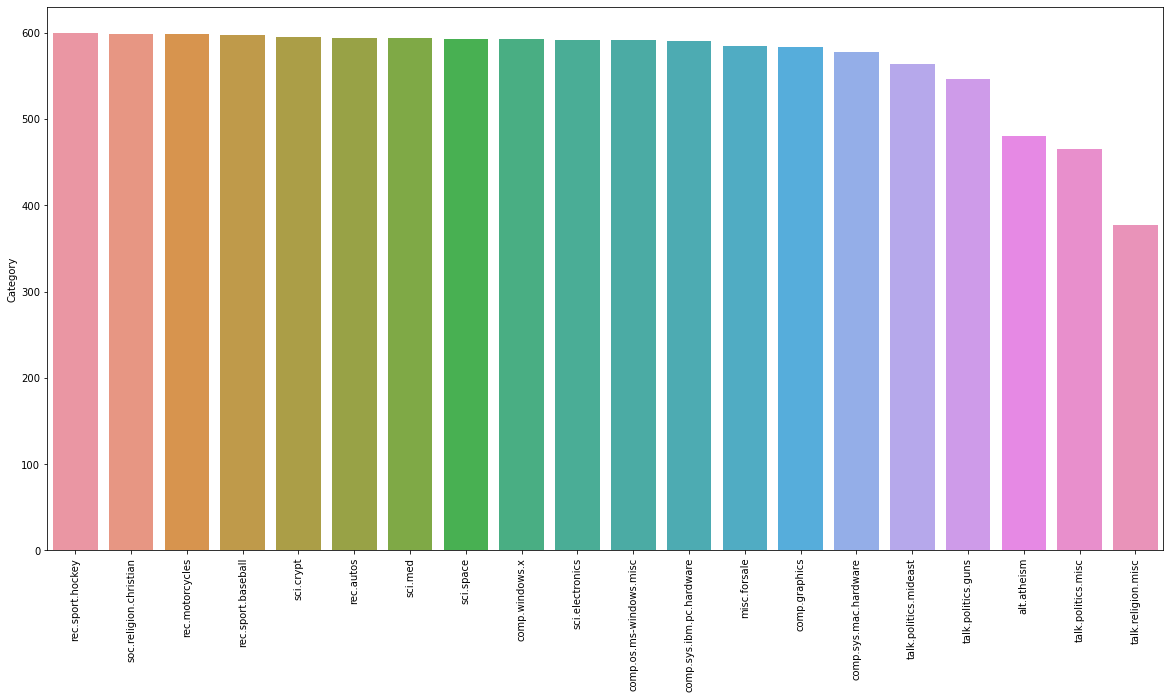

In [31]:
categorytable = trainDF['Category'].value_counts()
print(categorytable)
plt.figure(figsize = (20,10))
sns.barplot(x=categorytable.index, y=categorytable)
plt.xticks(rotation=90)
plt.show()

rec.sport.hockey            399
rec.motorcycles             398
soc.religion.christian      398
rec.sport.baseball          397
rec.autos                   396
sci.crypt                   396
sci.med                     396
comp.windows.x              395
sci.space                   394
comp.os.ms-windows.misc     394
sci.electronics             393
comp.sys.ibm.pc.hardware    392
misc.forsale                390
comp.graphics               389
comp.sys.mac.hardware       385
talk.politics.mideast       376
talk.politics.guns          364
alt.atheism                 319
talk.politics.misc          310
talk.religion.misc          251
Name: Category, dtype: int64


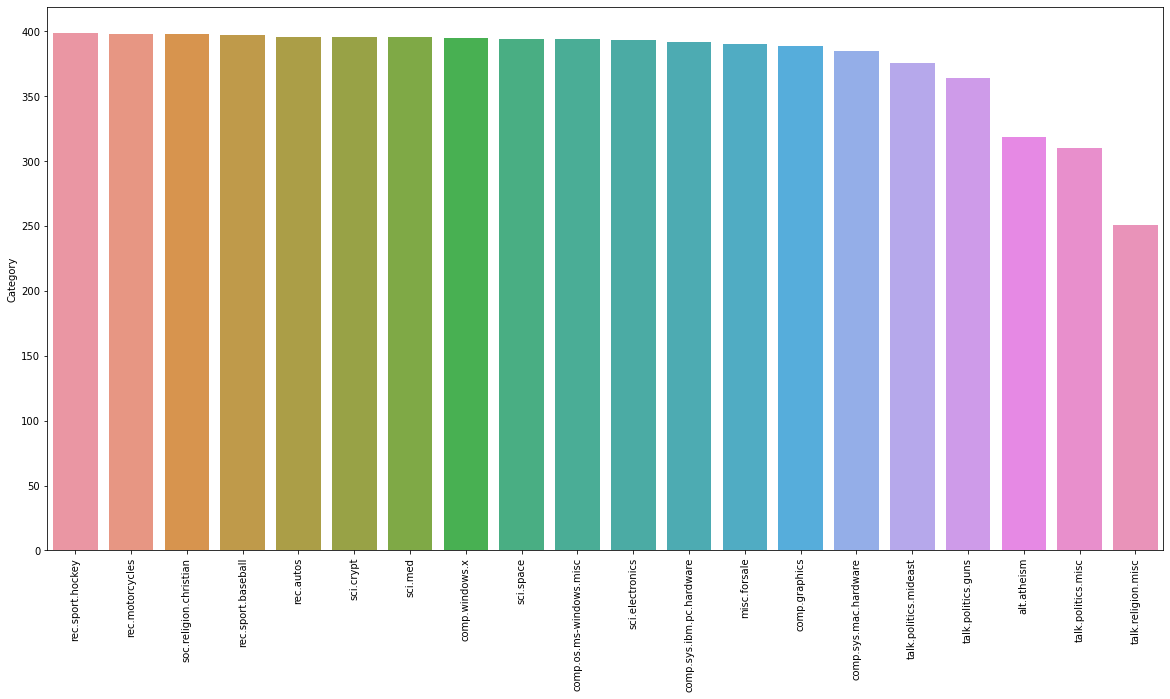

In [32]:
categorytable_test = testDF['Category'].value_counts()
print(categorytable_test)
plt.figure(figsize = (20,10))
sns.barplot(x=categorytable_test.index, y=categorytable_test)
plt.xticks(rotation=90)
plt.show()

In [33]:
print(categorytable_test/sum(categorytable_test))

rec.sport.hockey            0.052974
rec.motorcycles             0.052841
soc.religion.christian      0.052841
rec.sport.baseball          0.052708
rec.autos                   0.052576
sci.crypt                   0.052576
sci.med                     0.052576
comp.windows.x              0.052443
sci.space                   0.052310
comp.os.ms-windows.misc     0.052310
sci.electronics             0.052177
comp.sys.ibm.pc.hardware    0.052045
misc.forsale                0.051779
comp.graphics               0.051646
comp.sys.mac.hardware       0.051115
talk.politics.mideast       0.049920
talk.politics.guns          0.048327
alt.atheism                 0.042353
talk.politics.misc          0.041158
talk.religion.misc          0.033324
Name: Category, dtype: float64


In [34]:
print(categorytable/sum(categorytable))

rec.sport.hockey            0.053032
soc.religion.christian      0.052943
rec.motorcycles             0.052855
rec.sport.baseball          0.052766
sci.crypt                   0.052590
rec.autos                   0.052501
sci.med                     0.052501
sci.space                   0.052413
comp.windows.x              0.052413
sci.electronics             0.052236
comp.os.ms-windows.misc     0.052236
comp.sys.ibm.pc.hardware    0.052148
misc.forsale                0.051706
comp.graphics               0.051617
comp.sys.mac.hardware       0.051087
talk.politics.mideast       0.049850
talk.politics.guns          0.048259
alt.atheism                 0.042425
talk.politics.misc          0.041100
talk.religion.misc          0.033322
Name: Category, dtype: float64


In [35]:
#user_processedTrainDF = processDataframe(trainDF)
#user_processedTestDF = processDataframe(testDF)
#tf_transformer = TfidfTransformer(use_idf=False).fit(user_processedTrainDF['Post-processed Text'])
#user_processed_train_set = tf_transformer.transform(user_processedTrainDF['Post-processed Text'])
#user_processed_test_set = tf_transformer.transform(processedTestDF['Post-processed Text'])


#count_vect = CountVectorizer()
#count_vect_train_set = count_vect.fit_transform(trainDF['Text'])
#count_vect_test_set = count_vect.transform(testDF['Text'])

#tf_transformer = TfidfTransformer(use_idf=False).fit(count_vect_train_set)
#tf_processed_train_set = tf_transformer.transform(count_vect_train_set)
#tf_processed_test_set = tf_transformer.transform(count_vect_test_set)

vectorizer = TfidfVectorizer(stop_words=stopwords, token_pattern=r'(?u)\b[A-Za-z]+\b')
tfid_vect_train_vectors = vectorizer.fit_transform(trainDF['Text'])
tfid_vect_test_vectors = vectorizer.transform(testDF['Text'])

mNB_pipeline = Pipeline([
    ('vect', TfidfVectorizer(stop_words=stopwords, token_pattern=r'(?u)\b[A-Za-z]+\b')),
    ('clf', MultinomialNB()),
    
])

lr_pipeline = Pipeline([
    ('vect', TfidfVectorizer(stop_words=stopwords, token_pattern=r'(?u)\b[A-Za-z]+\b')),
    ('lr', LogisticRegression()),
    
])

len(vectorizer.get_feature_names_out())

81425

In [36]:
#print(tf_processed_train_set.shape, tf_processed_test_set.shape)
#print(tfid_vect_train_vectors.shape, tfid_vect_test_vectors.shape)

In [37]:
# 4-fun Visual representation of most common words in a given text

#frequency_dist = nltk.FreqDist(processedDF['Post-processed Text'][0])

#sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

#from wordcloud import WordCloud
#import matplotlib.pyplot as plt
#wordcloud = WordCloud()
#wordcloud.generate_from_frequencies(frequency_dist)
#plt.imshow(wordcloud)
#plt.axis("off")
#plt.show()

In [38]:
#Training a basic classifier for multinomial models

# No pipeline
default_clf = MultinomialNB().fit(tfid_vect_train_vectors, trainDF['Category'])
predicted = default_clf.predict(tfid_vect_test_vectors)

# Pipeline
mNB_pipeline.fit(trainDF['Text'], trainDF['Category'])
pipeline_predicted = mNB_pipeline.predict(testDF['Text'])
pipeline_predicted_train = mNB_pipeline.predict(trainDF['Text'])

In [39]:
np.mean(predicted == testDF['Category'])

0.8167817312798725

In [40]:
np.mean(pipeline_predicted == testDF['Category'])

0.8167817312798725

In [41]:
np.mean(pipeline_predicted_train == trainDF['Category'])

0.9557185787519887

In [42]:
print(accuracy_score(testDF['Category'], predicted))

0.8167817312798725


In [43]:
print(accuracy_score(testDF['Category'], pipeline_predicted))

0.8167817312798725


In [44]:
print(accuracy_score(trainDF['Category'], pipeline_predicted_train))

0.9557185787519887


In [45]:
print(classification_report(testDF['Category'], predicted))

                          precision    recall  f1-score   support

             alt.atheism       0.81      0.68      0.74       319
           comp.graphics       0.78      0.72      0.75       389
 comp.os.ms-windows.misc       0.75      0.72      0.74       394
comp.sys.ibm.pc.hardware       0.65      0.78      0.71       392
   comp.sys.mac.hardware       0.85      0.80      0.82       385
          comp.windows.x       0.85      0.80      0.83       395
            misc.forsale       0.85      0.79      0.82       390
               rec.autos       0.90      0.91      0.90       396
         rec.motorcycles       0.93      0.95      0.94       398
      rec.sport.baseball       0.92      0.93      0.93       397
        rec.sport.hockey       0.89      0.98      0.93       399
               sci.crypt       0.79      0.96      0.87       396
         sci.electronics       0.82      0.65      0.72       393
                 sci.med       0.92      0.79      0.85       396
         

In [46]:
#Training a non-basic classifier for multinomial models
offset_clf = MultinomialNB(alpha=0.0162, fit_prior=False).fit(tfid_vect_train_vectors, trainDF['Category'])
offset_predicted = offset_clf.predict(tfid_vect_test_vectors)

In [47]:
print(accuracy_score(testDF['Category'], offset_predicted))

0.831651619755709


In [48]:
pipeline_grid_param = [
    {
    #'vect__norm': ['l2'],
    #'vect__use_idf': [True],
    #'vect__smooth_idf': [False],
    #'vect__sublinear_tf': [True],
    #'vect__max_df': [0.145],
    #'clf__alpha':[0.0162],
    #'clf__fit_prior':[False],
    }
]
grid_param = [
    {
    'alpha':[0.00162, 0.0162, 0.1],
    'fit_prior':[False, True],
    }
]

# Pipeline gridsearch
pipeline_grid_search = GridSearchCV(mNB_pipeline, pipeline_grid_param, cv=5)

# Nonpipeline gridsearch
#grid_search = GridSearchCV(default_clf, grid_param, cv=5)

In [49]:
#grid_search.fit(tfid_vect_train_vectors, trainDF['Category'])

In [50]:
pipeline_grid_search.fit(trainDF['Text'], trainDF['Category'])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    "you're",
                                                                    "you've",
                                                                    "you'll",
                                                                    "you'd",
                                                                    'your',
  

In [51]:
#Pipeline MB prediction

pipeline_grid_predicted = pipeline_grid_search.predict(testDF['Text']) #Pipeline
np.mean(pipeline_grid_predicted == testDF['Category'])

0.8167817312798725

In [52]:
pipeline_grid_predicted_train = pipeline_grid_search.predict(trainDF['Text']) #Pipeline
np.mean(pipeline_grid_predicted_train == trainDF['Category'])

0.9557185787519887

In [53]:
#grid_search.best_score_

In [54]:
pipeline_grid_search.best_score_

0.881474283762976

In [55]:
#grid_search.best_params_

In [56]:
pipeline_grid_search.best_params_

{}

In [57]:
#Non pipeline MB prediction

#grid_predicted = grid_search.predict(tfid_vect_test_vectors)
#np.mean(grid_predicted == testDF['Category'])

In [58]:
pipeline_grid_search.cv_results_

{'mean_fit_time': array([2.1162291]),
 'std_fit_time': array([0.04803668]),
 'mean_score_time': array([0.48145819]),
 'std_score_time': array([0.01174311]),
 'params': [{}],
 'split0_test_score': array([0.88289881]),
 'split1_test_score': array([0.88908529]),
 'split2_test_score': array([0.8731772]),
 'split3_test_score': array([0.88068935]),
 'split4_test_score': array([0.88152078]),
 'mean_test_score': array([0.88147428]),
 'std_test_score': array([0.00508756]),
 'rank_test_score': array([1])}

In [59]:
# Time for LogisticRegression

# Pipeline
#lr_pipeline.fit(trainDF['Text'], trainDF['Category'])
#lr_pipeline_predicted = lr_pipeline.predict(testDF['Text'])

# No Pipeline
lr_default = LogisticRegression().fit(tfid_vect_train_vectors, trainDF['Category'])
lr_default_predicted = lr_default.predict(tfid_vect_test_vectors)

In [60]:
#print(np.mean(lr_pipeline_predicted == testDF['Category']))
print(np.mean(lr_default_predicted == testDF['Category']))

0.8305894848645778


In [61]:
#print(accuracy_score(testDF['Category'], lr_pipeline_predicted))
print(accuracy_score(testDF['Category'], lr_default_predicted))

0.8305894848645778


In [62]:
print(classification_report(testDF['Category'], lr_default_predicted))

                          precision    recall  f1-score   support

             alt.atheism       0.80      0.72      0.76       319
           comp.graphics       0.70      0.79      0.74       389
 comp.os.ms-windows.misc       0.75      0.75      0.75       394
comp.sys.ibm.pc.hardware       0.70      0.73      0.72       392
   comp.sys.mac.hardware       0.81      0.82      0.81       385
          comp.windows.x       0.82      0.78      0.80       395
            misc.forsale       0.80      0.85      0.82       390
               rec.autos       0.91      0.89      0.90       396
         rec.motorcycles       0.95      0.94      0.94       398
      rec.sport.baseball       0.90      0.93      0.92       397
        rec.sport.hockey       0.93      0.96      0.95       399
               sci.crypt       0.96      0.90      0.93       396
         sci.electronics       0.72      0.77      0.74       393
                 sci.med       0.89      0.87      0.88       396
         

In [63]:
# GRID AND RAND

pipeline_lr_param = [
    {
    'vect__norm': ['l2'],
    'vect__use_idf': [True],
    'vect__smooth_idf': [False],
    'vect__sublinear_tf': [True],
    'vect__max_df': [0.145],
    'lr__penalty':['l2'],
    'lr__solver': ['saga'],
    'lr__C': [65]
    }
]

lr_param = [
    {
    'penalty':['none'],
    'solver': ['saga'],
    }
]


# Pipeline gridsearch
pipeline_lr_grid_search = GridSearchCV(lr_pipeline, pipeline_lr_param, cv=5)
# Nonpipeline gridsearch
lr_grid_search = GridSearchCV(lr_default, lr_param, cv=5)

# Pipeline randsearch
pipeline_lr_rand_search = RandomizedSearchCV(lr_pipeline, pipeline_lr_param, cv=5)
# Nonpipeline randsearch
lr_rand_search = RandomizedSearchCV(lr_default, lr_param, cv=5)

In [64]:
#Nonpipeline grid fit

#lr_grid_search.fit(tfid_vect_train_vectors, trainDF['Category']) #grid

In [65]:
#Nonpipeline rand fit

#lr_rand_search.fit(tfid_vect_train_vectors, trainDF['Category']) # rand

In [66]:
#Pipeline grid fit

pipeline_lr_grid_search.fit(trainDF['Text'], trainDF['Category']) #grid

C:\Users\James\anaconda3\envs\venv\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\James\anaconda3\envs\venv\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\James\anaconda3\envs\venv\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\James\anaconda3\envs\venv\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\James\anaconda3\envs\venv\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\James\anaconda3\envs\venv\lib\site-packages\sklearn

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    "you're",
                                                                    "you've",
                                                                    "you'll",
                                                                    "you'd",
                                                                    'your',
  

In [67]:
#Pipeline rand fit

pipeline_lr_rand_search.fit(trainDF['Text'], trainDF['Category']) #rand

C:\Users\James\anaconda3\envs\venv\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\James\anaconda3\envs\venv\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\James\anaconda3\envs\venv\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\James\anaconda3\envs\venv\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\James\anaconda3\envs\venv\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('vect',
                                              TfidfVectorizer(stop_words=['i',
                                                                          'me',
                                                                          'my',
                                                                          'myself',
                                                                          'we',
                                                                          'our',
                                                                          'ours',
                                                                          'ourselves',
                                                                          'you',
                                                                          "you're",
                                                                          "you've",
                   

In [68]:
#Non pipeline grid SCORE AND PREDICTION

#lr_grid__predicted = lr_grid_search.predict(tfid_vect_test_vectors) #Pipeline
#np.mean(lr_grid__predicted == testDF['Category'])

In [69]:
#print('Best score:')
#lr_grid_search.best_score_

In [70]:
#print('Best Params:')
#lr_grid_search.best_params_

In [71]:
#Non pipeline rand SCORE AND PREDICTION

#lr_rand_predicted= lr_rand_search.predict(tfid_vect_test_vectors) 
#np.mean(lr_rand_predicted == testDF['Category'])

In [72]:
#print('Best score:')
#lr_rand_search.best_score_

In [73]:
#print('Best Params:')
#lr_rand_search.best_params_

In [74]:
#Pipeline grid SCORE AND PREDICTION

pipeline_lr_grid_predicted = pipeline_lr_grid_search.predict(testDF['Text']) #Pipeline
np.mean(pipeline_lr_grid_predicted == testDF['Category'])

0.8523632501327668

In [75]:
print('Best score:')
pipeline_lr_grid_search.best_score_

Best score:


0.9259333146574678

In [76]:
print('Best Params:')
pipeline_lr_grid_search.best_params_

Best Params:


{'lr__C': 65,
 'lr__penalty': 'l2',
 'lr__solver': 'saga',
 'vect__max_df': 0.145,
 'vect__norm': 'l2',
 'vect__smooth_idf': False,
 'vect__sublinear_tf': True,
 'vect__use_idf': True}

In [77]:
#Pipeline rand SCORE AND PREDICTION
 
pipeline_lr_rand_predicted= pipeline_lr_rand_search.predict(testDF['Text']) 
np.mean(pipeline_lr_rand_predicted == testDF['Category'])

0.8526287838555496

In [78]:
print('Best score:')
pipeline_lr_rand_search.best_score_

Best score:


0.9259331974449229

In [79]:
print('Best Params:')
pipeline_lr_rand_search.best_params_

Best Params:


{'vect__use_idf': True,
 'vect__sublinear_tf': True,
 'vect__smooth_idf': False,
 'vect__norm': 'l2',
 'vect__max_df': 0.145,
 'lr__solver': 'saga',
 'lr__penalty': 'l2',
 'lr__C': 65}

In [80]:
pipeline_lr_rand_search.cv_results_

{'mean_fit_time': array([16.13159204]),
 'std_fit_time': array([0.44614012]),
 'mean_score_time': array([0.47931266]),
 'std_score_time': array([0.01185425]),
 'param_vect__use_idf': masked_array(data=[True],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_vect__sublinear_tf': masked_array(data=[True],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_vect__smooth_idf': masked_array(data=[False],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_vect__norm': masked_array(data=['l2'],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_vect__max_df': masked_array(data=[0.145],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_lr__solver': masked_array(data=['saga'],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_lr__penalty': masked_array(data=['l2'],
        

In [81]:
pipeline_lr_grid_search.cv_results_

{'mean_fit_time': array([16.8665103]),
 'std_fit_time': array([0.60260407]),
 'mean_score_time': array([0.49272151]),
 'std_score_time': array([0.01672438]),
 'param_lr__C': masked_array(data=[65],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_lr__penalty': masked_array(data=['l2'],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_lr__solver': masked_array(data=['saga'],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_vect__max_df': masked_array(data=[0.145],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_vect__norm': masked_array(data=['l2'],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_vect__smooth_idf': masked_array(data=[False],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_vect__sublinear_tf': masked_array(data=[True],
              mask=

In [ ]:
cm = confusion_matrix(testDF['Category'], lr_predicted)
plt.figure(figsize=(15,15))
sns.heatmap(cm, xticklabels=testDF['Category'], yticklabels=testDF['Category'], annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(testDF['Category'], lr_predicted))
plt.title(all_sample_title, size = 15);